In [1]:
import numpy as np 
import pandas as pd 
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from matplotlib import pyplot as plt

In [2]:
# Specify the path to the main directory
main_directory = '/kaggle/input/toyota-cars-over-20k-labeled-images/toyota_image_dataset_v2'

folder_count = 0
total_file_count = 0

basenames = []
file_counter = []


for root, dirs, files in os.walk(main_directory):
    
    folder_count += len(dirs)
    folder_file_count = len(files)
    total_file_count += folder_file_count
    
    print(f"Folder: {os.path.basename(root)}, Files: {folder_file_count}")
    basenames.append(os.path.basename(root))
    file_counter.append(folder_file_count)
    

print(f"\nNumber of folders: {folder_count}")
print(f"Total number of files: {total_file_count}")


Folder: toyota_image_dataset_v2, Files: 4
Folder: toyota_cars, Files: 0
Folder: supra, Files: 173
Folder: venza, Files: 122
Folder: matrix, Files: 63
Folder: rush, Files: 23
Folder: revo, Files: 162
Folder: rav4, Files: 1786
Folder: aygo, Files: 109
Folder: avanza, Files: 63
Folder: vitz, Files: 102
Folder: hiace, Files: 75
Folder: innova, Files: 121
Folder: fortuner, Files: 254
Folder: yaris, Files: 844
Folder: camry, Files: 2246
Folder: sequoia, Files: 166
Folder: tundra, Files: 1035
Folder: hilux, Files: 435
Folder: 4runner, Files: 946
Folder: avensis, Files: 167
Folder: iq, Files: 27
Folder: crown, Files: 77
Folder: highlander, Files: 1119
Folder: sienna, Files: 652
Folder: estima, Files: 32
Folder: soarer, Files: 48
Folder: tacoma, Files: 1318
Folder: alphard, Files: 64
Folder: previa, Files: 44
Folder: starlet, Files: 48
Folder: vios, Files: 141
Folder: mirai, Files: 57
Folder: corolla, Files: 2311
Folder: celica, Files: 101
Folder: verso, Files: 112
Folder: prius, Files: 1039
Fo

In [3]:
base_names = basenames[2:]

In [4]:
file_counter[2:]

[173,
 122,
 63,
 23,
 162,
 1786,
 109,
 63,
 102,
 75,
 121,
 254,
 844,
 2246,
 166,
 1035,
 435,
 946,
 167,
 27,
 77,
 1119,
 652,
 32,
 48,
 1318,
 64,
 44,
 48,
 141,
 57,
 2311,
 101,
 112,
 1039,
 74,
 497,
 70]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


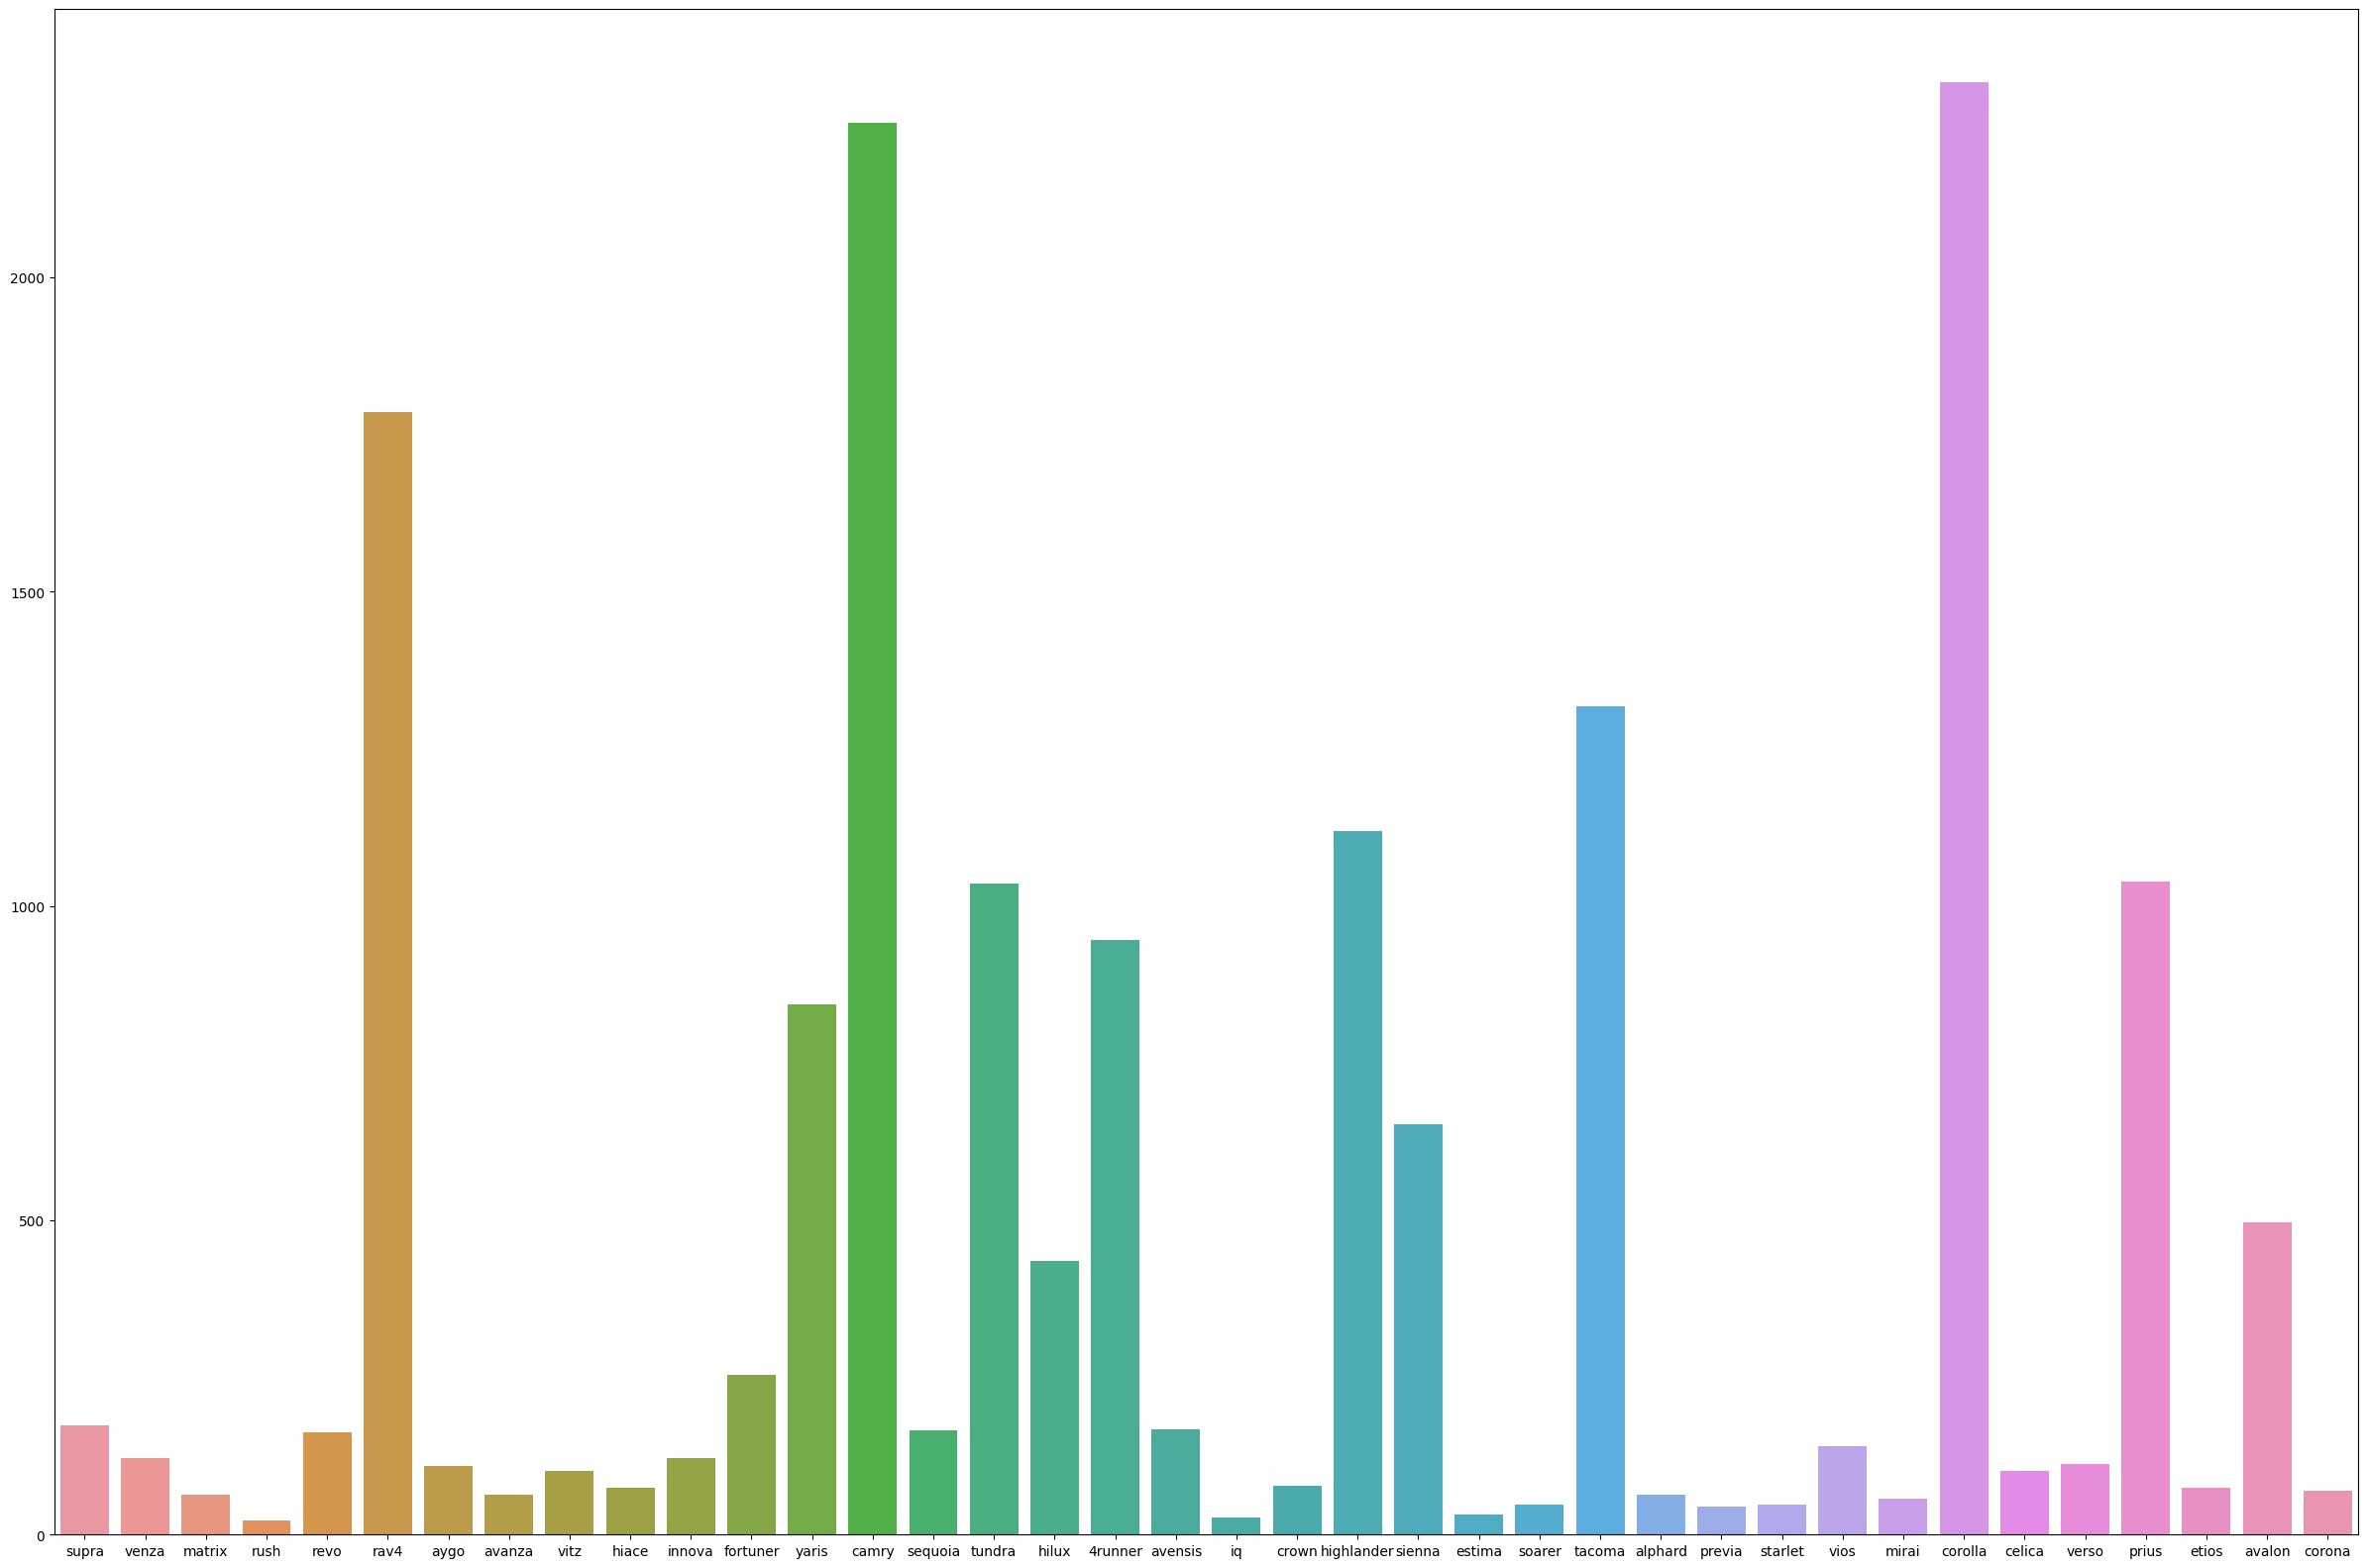

In [5]:
import seaborn as sns

x = basenames[2:]  
y = file_counter[2:]     
plt.figure(figsize=(30, 20))
sns.barplot(x=x, y=y)
plt.show()

In [6]:
names_to_labels = {}
label = 0
for name in base_names:
    names_to_labels[name] = label
    label += 1

In [7]:
names_to_labels

{'supra': 0,
 'venza': 1,
 'matrix': 2,
 'rush': 3,
 'revo': 4,
 'rav4': 5,
 'aygo': 6,
 'avanza': 7,
 'vitz': 8,
 'hiace': 9,
 'innova': 10,
 'fortuner': 11,
 'yaris': 12,
 'camry': 13,
 'sequoia': 14,
 'tundra': 15,
 'hilux': 16,
 '4runner': 17,
 'avensis': 18,
 'iq': 19,
 'crown': 20,
 'highlander': 21,
 'sienna': 22,
 'estima': 23,
 'soarer': 24,
 'tacoma': 25,
 'alphard': 26,
 'previa': 27,
 'starlet': 28,
 'vios': 29,
 'mirai': 30,
 'corolla': 31,
 'celica': 32,
 'verso': 33,
 'prius': 34,
 'etios': 35,
 'avalon': 36,
 'corona': 37}

In [8]:
label_dict = names_to_labels

In [9]:
import os
import shutil


directory_path = '/kaggle/working/'

for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isfile(item_path) or os.path.islink(item_path):
        os.unlink(item_path)
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("Contents of the working directory cleared.")

Contents of the working directory cleared.


In [10]:
# Source directory
source_directory = '/kaggle/input/toyota-cars-over-20k-labeled-images/toyota_image_dataset_v2/toyota_cars'

# Destination directory
destination_directory = '/kaggle/working/'


train_directory = os.path.join(destination_directory, 'train')
test_dir = os.path.join(destination_directory, 'test')
os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


# 10 Class Choose
folders = ['fortuner','hilux','venza','matrix','sienna','avalon','4runner','yaris','prius','vios']

for folder in folders:
    folder_path = os.path.join(source_directory, folder)
    all_images = [img for img in os.listdir(folder_path) if img.endswith('.jpg')]
    label = folder

    random.shuffle(all_images)

    # Calculate split index for 80% train, 20% test
    train_size = int(len(all_images) * 0.8)
    
    # Split images into train and test
    train_images = all_images[:train_size]
    test_images = all_images[train_size:]
    
    
    for img in train_images:
        image_path = os.path.join(folder_path, img)
        destination_path = os.path.join(train_directory, label, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(image_path, destination_path)
    
    
    for img in test_images:
        image_path = os.path.join(folder_path, img)
        destination_path = os.path.join(test_dir, label, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy(image_path, destination_path)
        

print("Data splitting completed.")

Data splitting completed.


In [11]:
train_directory = '/kaggle/working/train'
test_directory = '/kaggle/working/test'
output_directory = '/kaggle/working/train_resized'

def resize_and_save(image_paths, output_directory):
    processed_images = []
    images_without_car = 0
    images_without_exist = 0
    images_without_access = 0
    images_without_size = 0
    images_without_img = 0
    
    for i, image_path in enumerate(image_paths):
        
        if not os.path.exists(image_path):
            images_without_exist += 1
            continue
        if not os.access(image_path, os.R_OK):
            images_without_access += 1
            continue
        
        file_size = os.path.getsize(image_path)
        if file_size == 0:
            images_without_size += 1
            continue
        
        img = cv2.imread(image_path)
        
        if img is None:
            images_without_img += 1
            continue
            
        if len(img) > 0:
            # Resize to 224x224
            resized_car = cv2.resize(img, (224, 224))
            # Normalize pixel values to [0,1]
            #normalized_car = resized_car / 255.0
            
            folder_name = image_path.split('/')[-2]
            output_folder = os.path.join(output_directory, folder_name)
            os.makedirs(output_folder, exist_ok=True)
            
            # Save the image
            image_output_path = os.path.join(output_folder, f"detected_car_{i}.jpg")
            cv2.imwrite(image_output_path, resized_car)
            
            # Save the normalized array
            #array_output_path = os.path.join(output_folder, f"detected_car_{i}.npy")
            #np.save(array_output_path, normalized_car)
            
            #processed_images.append(normalized_car)
        else:
            images_without_car += 1

        if i % 50 == 0:
            print(f"{i}/{len(image_paths)} images processed", end='\r', flush=True)

    print(f"\nImages without car detected/Total images: {images_without_exist} - {images_without_access} - {images_without_size} - {images_without_img} - {images_without_car}/{len(image_paths)}")
    return 1

os.makedirs(output_directory, exist_ok=True)

all_image_paths = []
for folder_name in os.listdir(train_directory):
    folder_path = os.path.join(train_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

resize_and_save(all_image_paths, output_directory)


print("train resized , prec complete")

3950/3990 images processed
Images without car detected/Total images: 0 - 0 - 0 - 6 - 0/3990
train resized , prec complete


In [12]:
output_directory = '/kaggle/working/test_resized'

os.makedirs(output_directory, exist_ok=True)

all_image_paths = []
for folder_name in os.listdir(test_directory):
    folder_path = os.path.join(test_directory, folder_name)
    if os.path.isdir(folder_path):
        image_paths = [os.path.join(folder_path, image_name) for image_name in os.listdir(folder_path)]
        all_image_paths.extend(image_paths)

resize_and_save(all_image_paths, output_directory)


print("test resized , prec complete")

1000/1003 images processed
Images without car detected/Total images: 0 - 0 - 0 - 1 - 0/1003
test resized , prec complete


Folder: yaris, File Count: 673
Folder: avalon, File Count: 397
Folder: 4runner, File Count: 756
Folder: hilux, File Count: 348
Folder: matrix, File Count: 50
Folder: prius, File Count: 831
Folder: venza, File Count: 97
Folder: vios, File Count: 109
Folder: fortuner, File Count: 202
Folder: sienna, File Count: 521


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


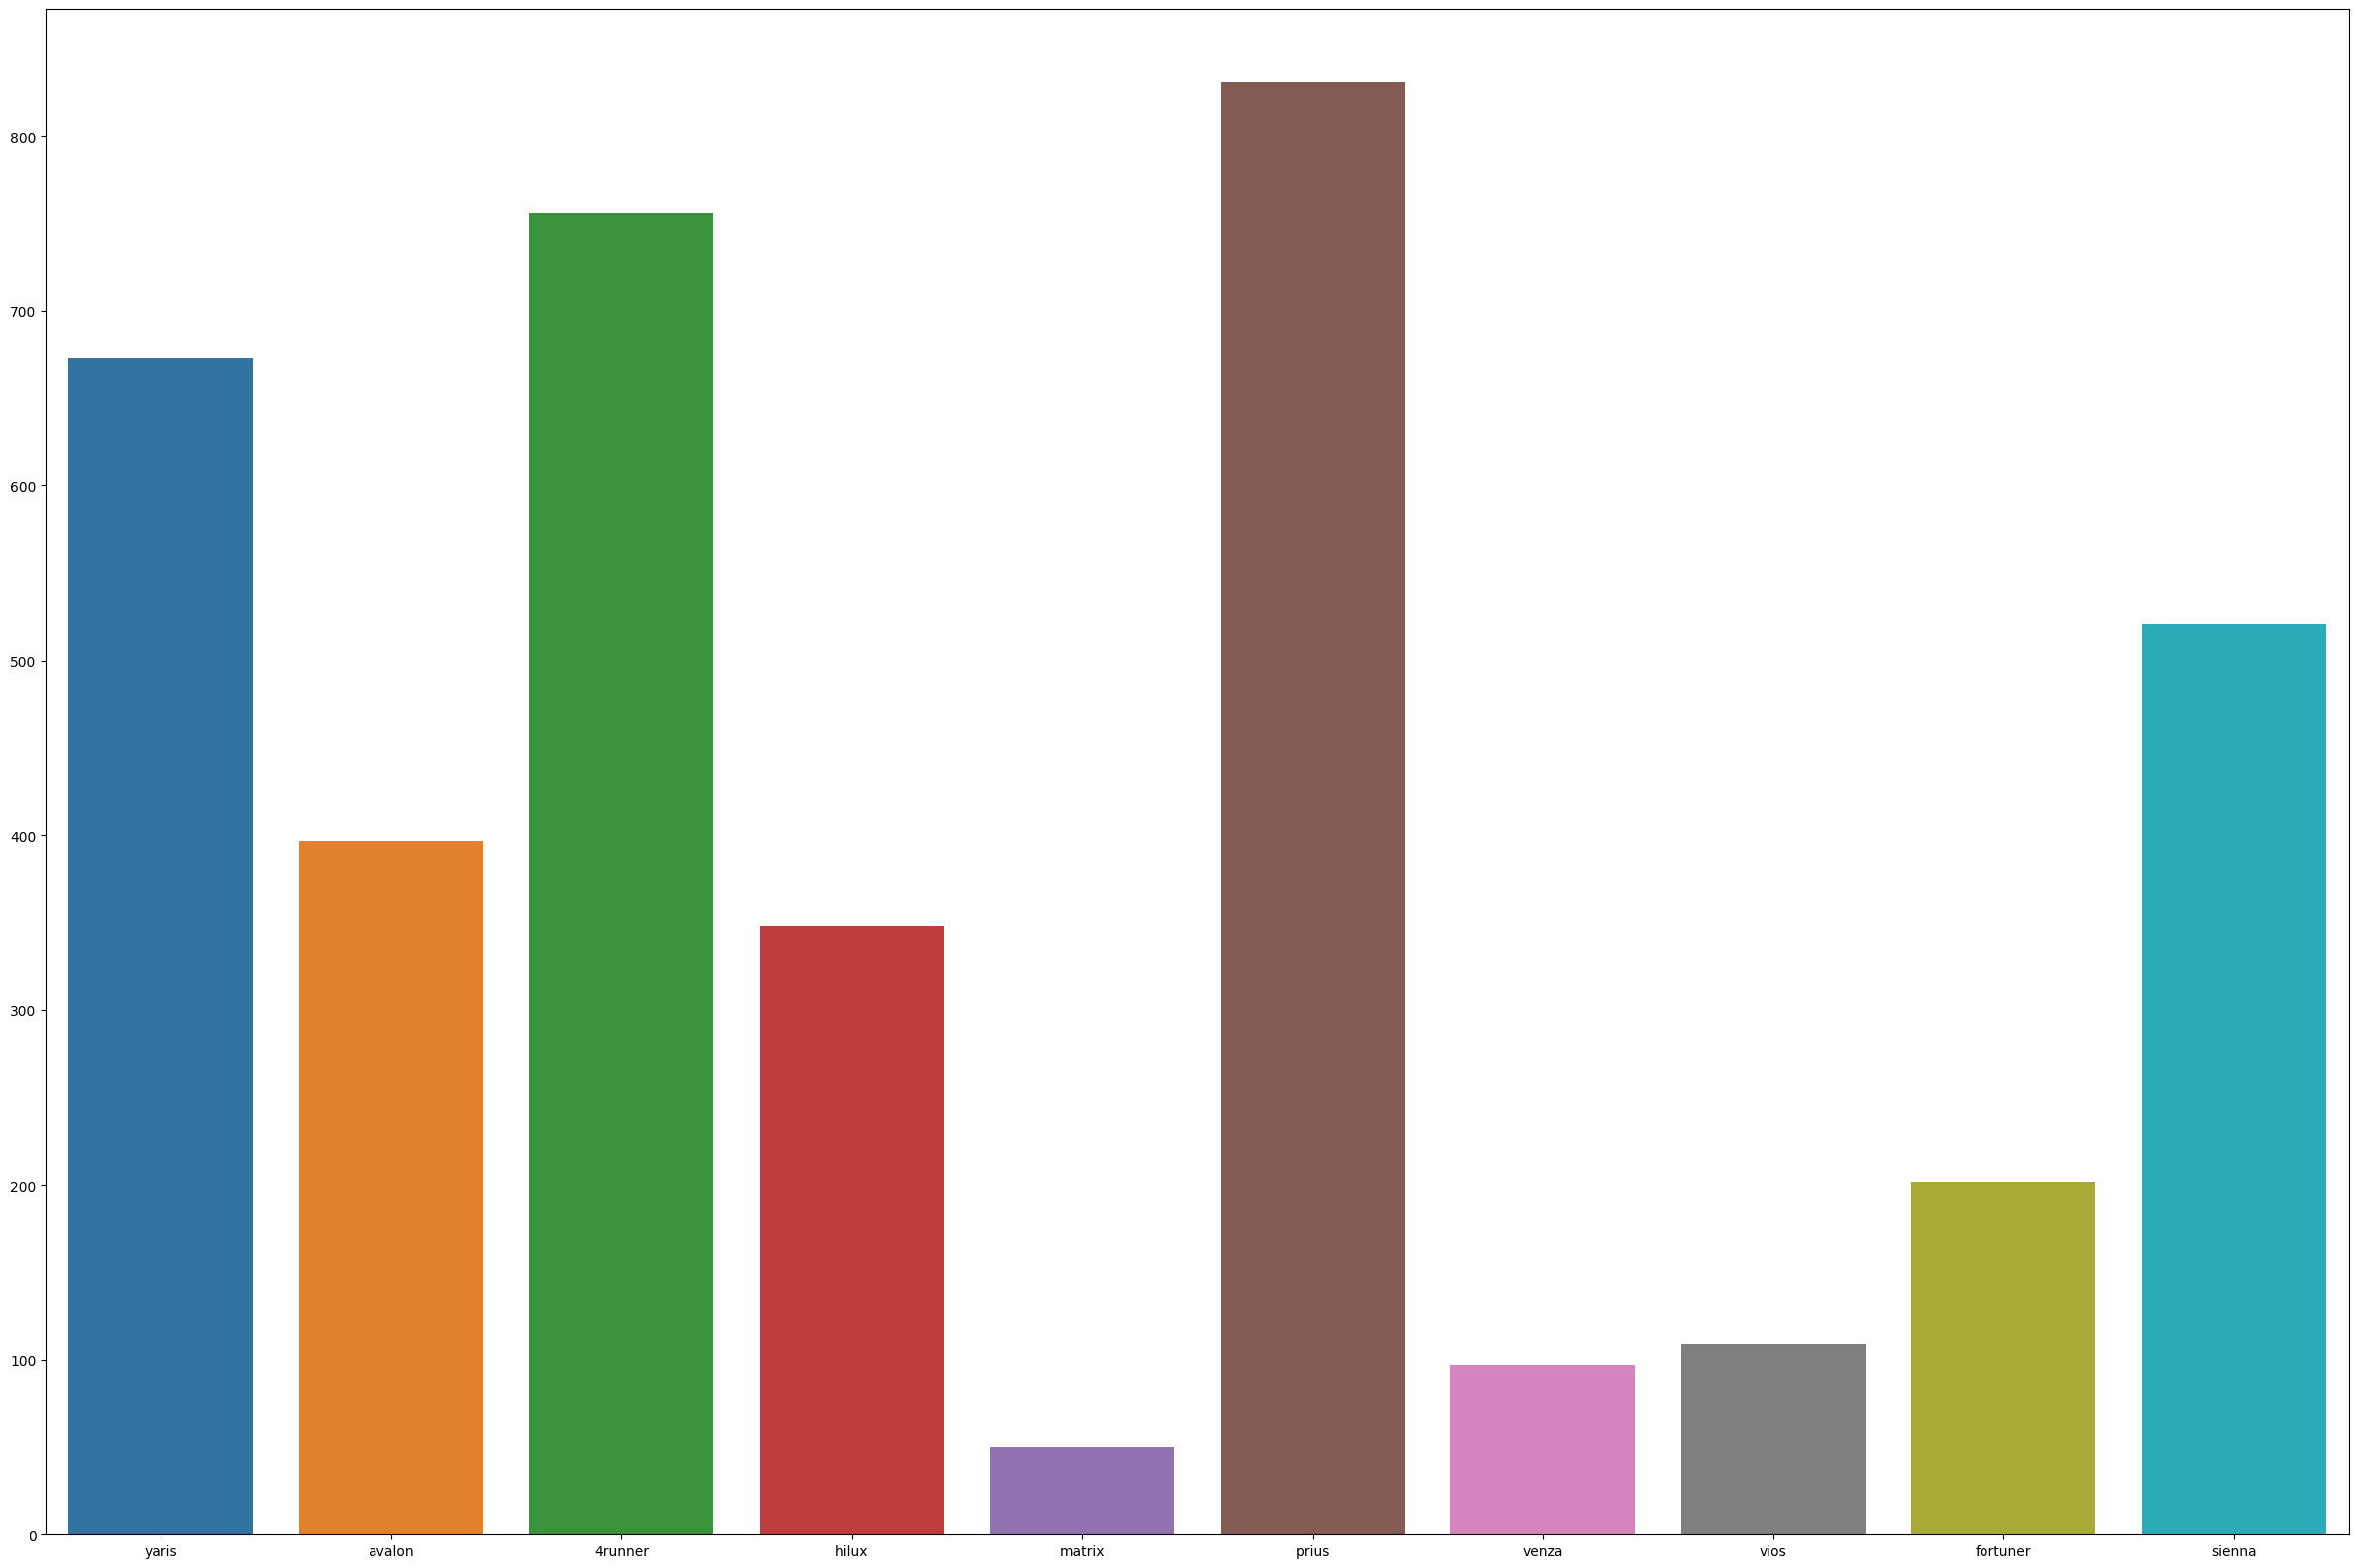

In [13]:
output_directory = '/kaggle/working/train_resized'


all_folders = [folder for folder in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, folder))]
file_counter_train = []

for folder in all_folders:
    folder_path = os.path.join(output_directory, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")
    file_counter_train.append(file_count)
x = all_folders  # Categories
y = file_counter_train     # Values
plt.figure(figsize=(30, 20))
# Create the bar plot
sns.barplot(x=x, y=y)
plt.show()

Folder: yaris, File Count: 169
Folder: avalon, File Count: 100
Folder: 4runner, File Count: 190
Folder: hilux, File Count: 87
Folder: matrix, File Count: 13
Folder: prius, File Count: 208
Folder: venza, File Count: 25
Folder: vios, File Count: 28
Folder: fortuner, File Count: 51
Folder: sienna, File Count: 131


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


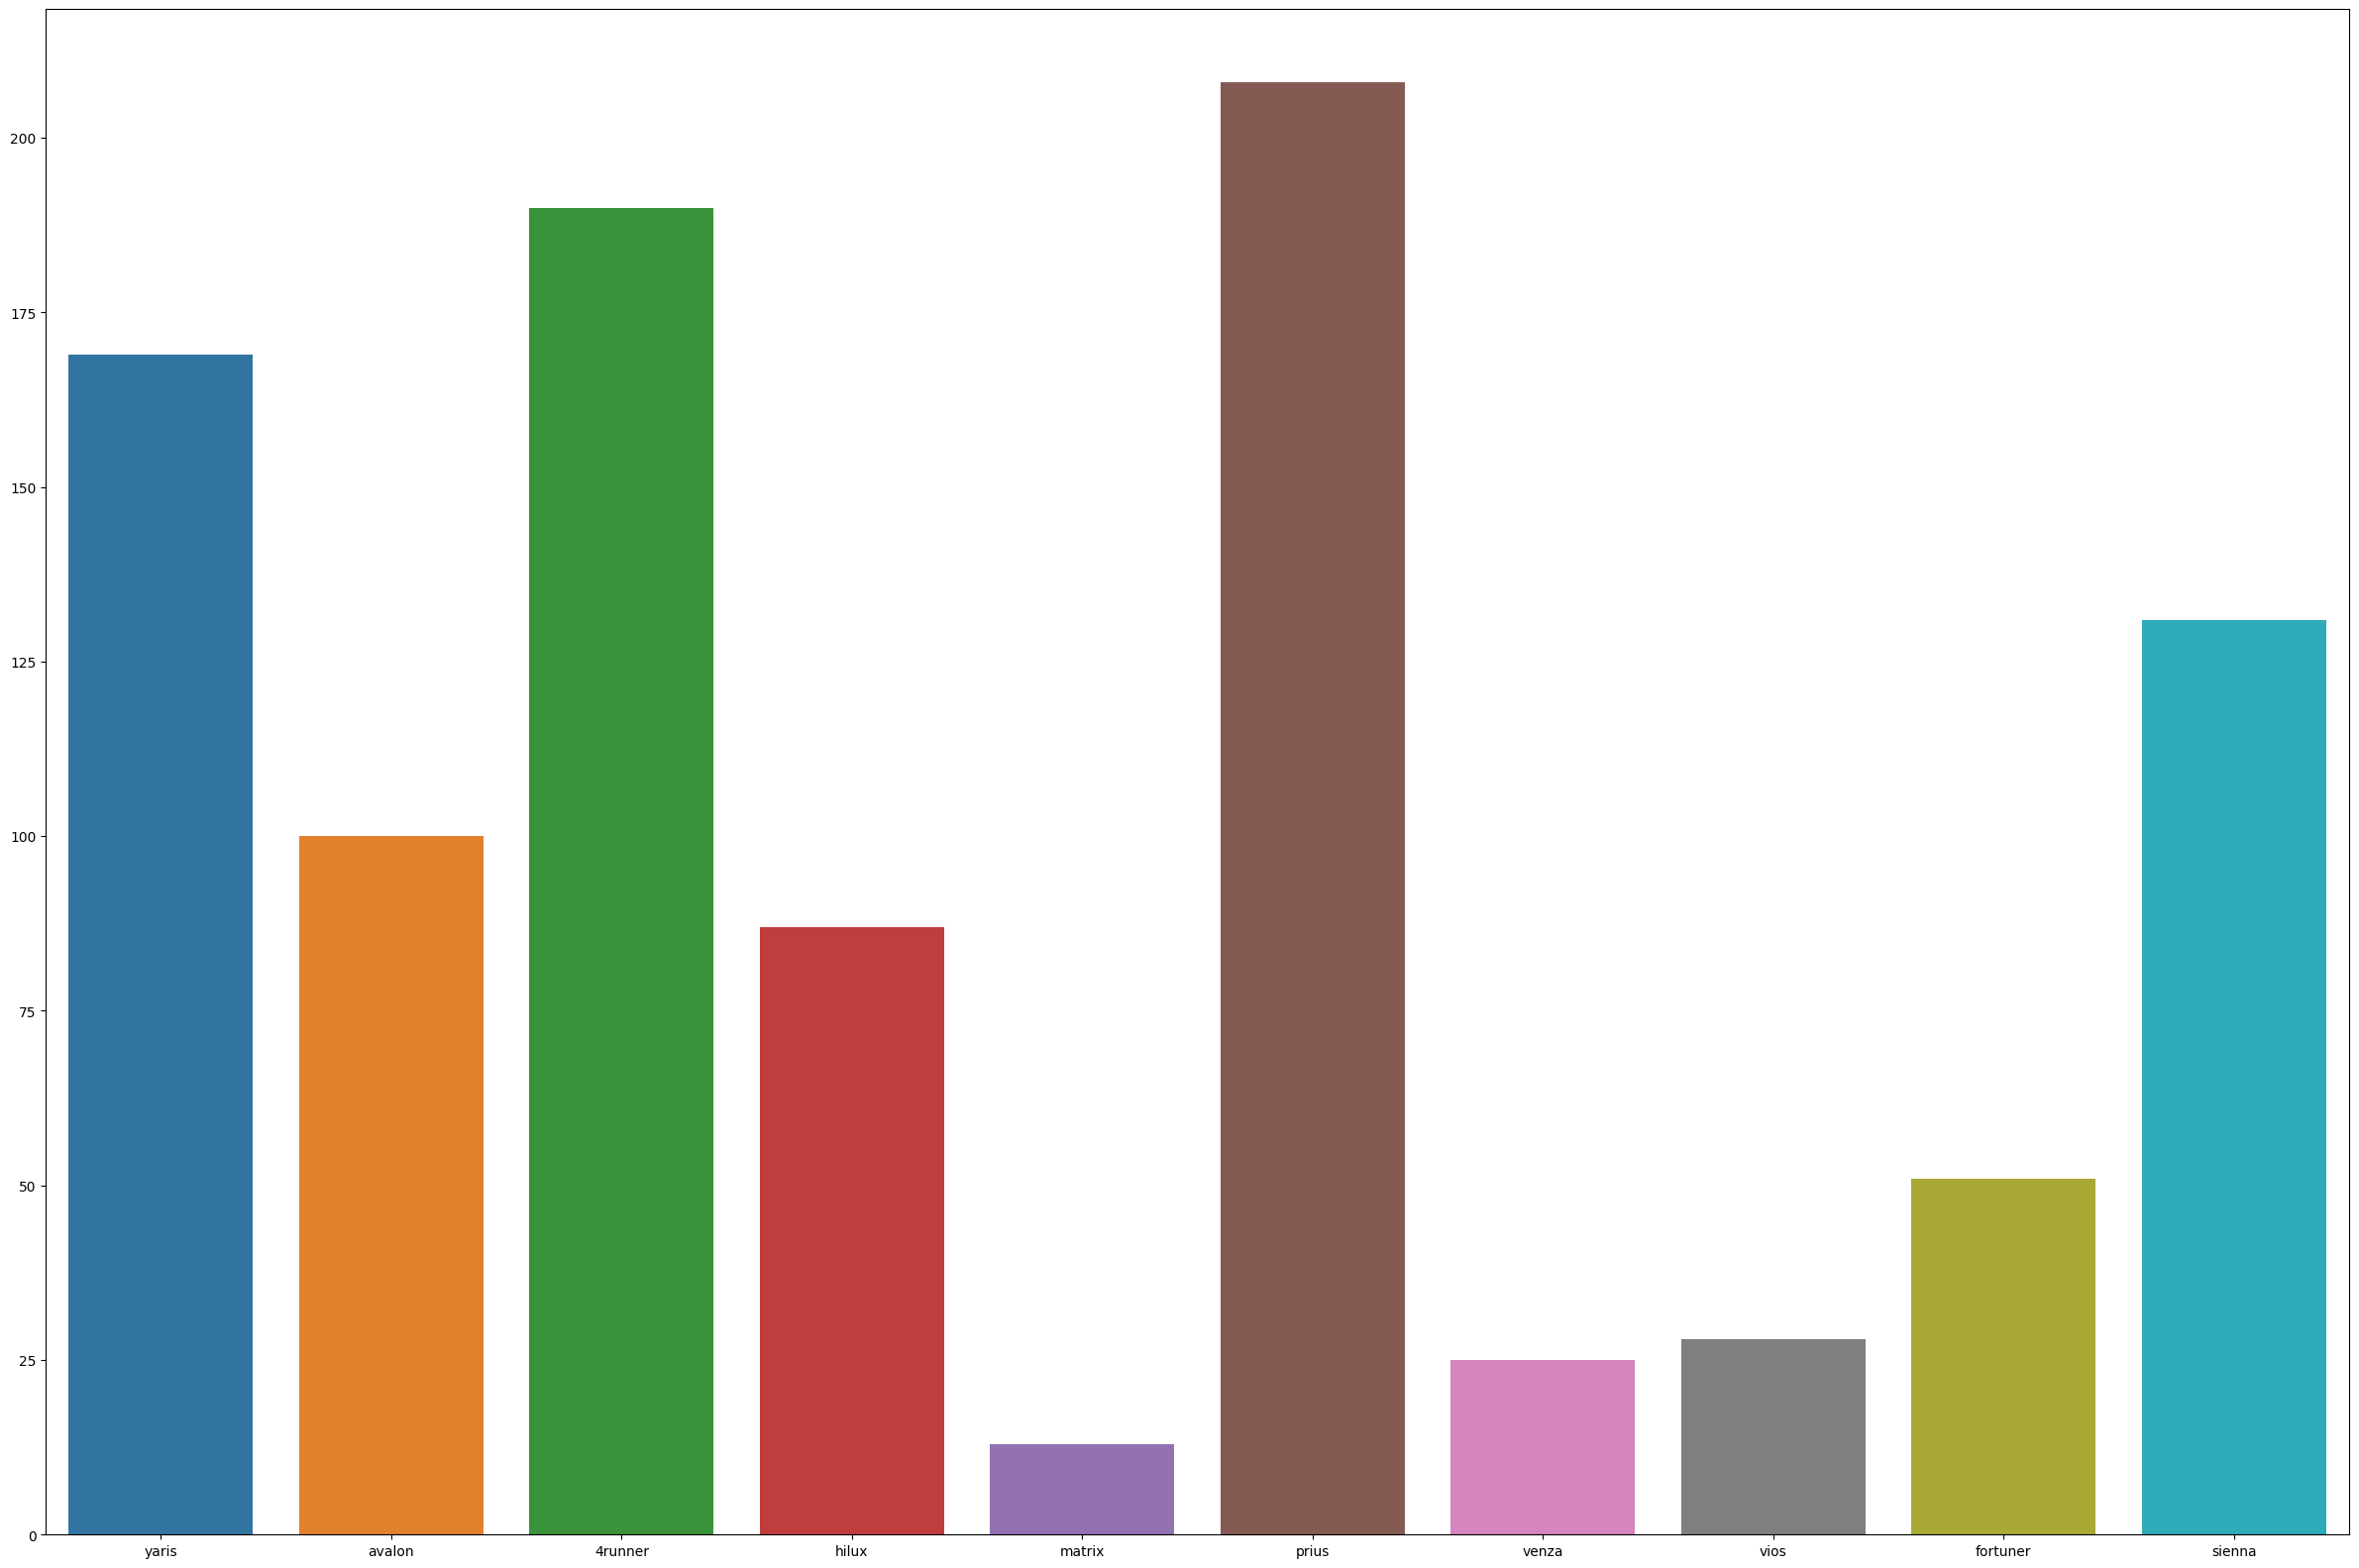

In [14]:
output_directory = '/kaggle/working/test_resized'

all_folders = [folder for folder in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, folder))]
file_counter_test = []
for folder in all_folders:
    folder_path = os.path.join(output_directory, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")
    file_counter_test.append(file_count)
x = all_folders  # Categories
y = file_counter_test     # Values
plt.figure(figsize=(30, 20))
# Create the bar plot
sns.barplot(x=x, y=y)
plt.show()

In [15]:
from pathlib import Path
import random

# Directory
train_directory = "/kaggle/working/train_resized"

# Class folders
class_counts = {
    "vios": 108,
    "yaris": 674,
    "matrix": 50,
    "4runner": 756,
    "avalon": 397,
    "prius": 831,
    "fortuner": 235,
    "venza": 97,
    "hilux": 348,
    "sienna": 521
}

# Target number of images per class
target_count = 500

# Augmentation functions
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, matrix, (w, h))
    return rotated

def flip_image(image, flip_code):
    return cv2.flip(image, flip_code)

def scale_image(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    scaled = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    return scaled

def translate_image(image, tx, ty):
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))
    return translated

def adjust_brightness_contrast(image, alpha, beta):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def add_gaussian_noise(image):
    row, col, ch = image.shape
    mean = 0
    var = random.uniform(0.1, 10.0)
    sigma = var ** 0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

def random_crop(image, crop_ratio=0.8):
    h, w = image.shape[:2]
    crop_h, crop_w = int(h * crop_ratio), int(w * crop_ratio)
    if crop_h > h or crop_w > w:
        return image
    x = random.randint(0, w - crop_w)
    y = random.randint(0, h - crop_h)
    cropped = image[y:y + crop_h, x:x + crop_w]
    return cv2.resize(cropped, (w, h))


augmentation_functions = [
    lambda img: rotate_image(img, random.uniform(-30, 30)),
    lambda img: flip_image(img, random.choice([0, 1, -1])),
    lambda img: scale_image(img, random.uniform(0.8, 1.2)),
    lambda img: translate_image(img, random.randint(-50, 50), random.randint(-50, 50)),
    lambda img: adjust_brightness_contrast(img, random.uniform(0.8, 1.2), random.randint(-20, 20)),
    lambda img: add_gaussian_noise(img),
    lambda img: random_crop(img, crop_ratio=0.8)
]

def augment_image(image):
    num_transforms = random.randint(1, 3)
    transforms = random.sample(augmentation_functions, num_transforms)
    aug_image = image.copy()
    for transform in transforms:
        aug_image = transform(aug_image)
    return aug_image


def downsample_class(class_name, class_dir, current_count, target_count):
    print(f"Downsampling class: {class_name} (Current: {current_count}, Target: {target_count})")
    images_to_delete = current_count - target_count
    if images_to_delete <= 0:
        print(f"No downsampling needed for {class_name}")
        return
    
    
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print(f"No images found in {class_name}")
        return
    
    images_to_delete = random.sample(image_files, images_to_delete)
    for image_file in images_to_delete:
        image_path = os.path.join(class_dir, image_file)
        try:
            os.remove(image_path)
            print(f"Deleted {image_path}")
        except Exception as e:
            print(f"Failed to delete {image_path}: {e}")
    
    print(f"Deleted {len(images_to_delete)} images from {class_name}")

def upsample_class(class_name, class_dir, current_count, target_count):
    print(f"Upsampling class: {class_name} (Current: {current_count}, Target: {target_count})")
    
    images_needed = target_count - current_count
    if images_needed <= 0:
        print(f"No upsampling needed for {class_name}")
        return
    
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print(f"No images found in {class_name}")
        return
    
    augmentations_per_image = max(1, images_needed // len(image_files) + 1)
    print(f"Generating {augmentations_per_image} augmentations per image for {class_name}")
    
    aug_count = 0
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load {image_path}")
            continue

        for i in range(augmentations_per_image):
            if aug_count >= images_needed:
                break
            aug_image = augment_image(image)
            
            file_name = f"aug_{class_name}_{aug_count}_{image_file}"
            save_path = os.path.join(class_dir, file_name)
            cv2.imwrite(save_path, aug_image)
            aug_count += 1
    
    print(f"Generated {aug_count} augmented images for {class_name}")


for class_name, current_count in class_counts.items():
    class_dir = os.path.join(train_directory, class_name)
    if not os.path.exists(class_dir):
        print(f"Directory {class_dir} does not exist")
        continue
    
    if current_count > target_count:
        downsample_class(class_name, class_dir, current_count, target_count)
    elif current_count < target_count:
        upsample_class(class_name, class_dir, current_count, target_count)
    else:
        print(f"Class {class_name} already has {target_count} images, no action needed")


print("\nNew class counts after balancing:")
for class_name in class_counts:
    class_dir = os.path.join(train_directory, class_name)
    if os.path.exists(class_dir):
        count = len([f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"Folder: {class_name}, File Count: {count}")

print("Hybrid dataset balancing completed!")

Upsampling class: vios (Current: 108, Target: 500)
Generating 4 augmentations per image for vios
Generated 392 augmented images for vios
Downsampling class: yaris (Current: 674, Target: 500)
Deleted /kaggle/working/train_resized/yaris/detected_car_221.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_94.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_116.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_505.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_381.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_477.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_310.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_523.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_359.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_338.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_478.jpg
Deleted /kaggle/working/train_resized/yaris/detected_car_133.jpg
Deleted /kaggle/working/train_

Folder: yaris, File Count: 499
Folder: avalon, File Count: 500
Folder: 4runner, File Count: 500
Folder: hilux, File Count: 500
Folder: matrix, File Count: 500
Folder: prius, File Count: 500
Folder: venza, File Count: 500
Folder: vios, File Count: 501
Folder: fortuner, File Count: 467
Folder: sienna, File Count: 500


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


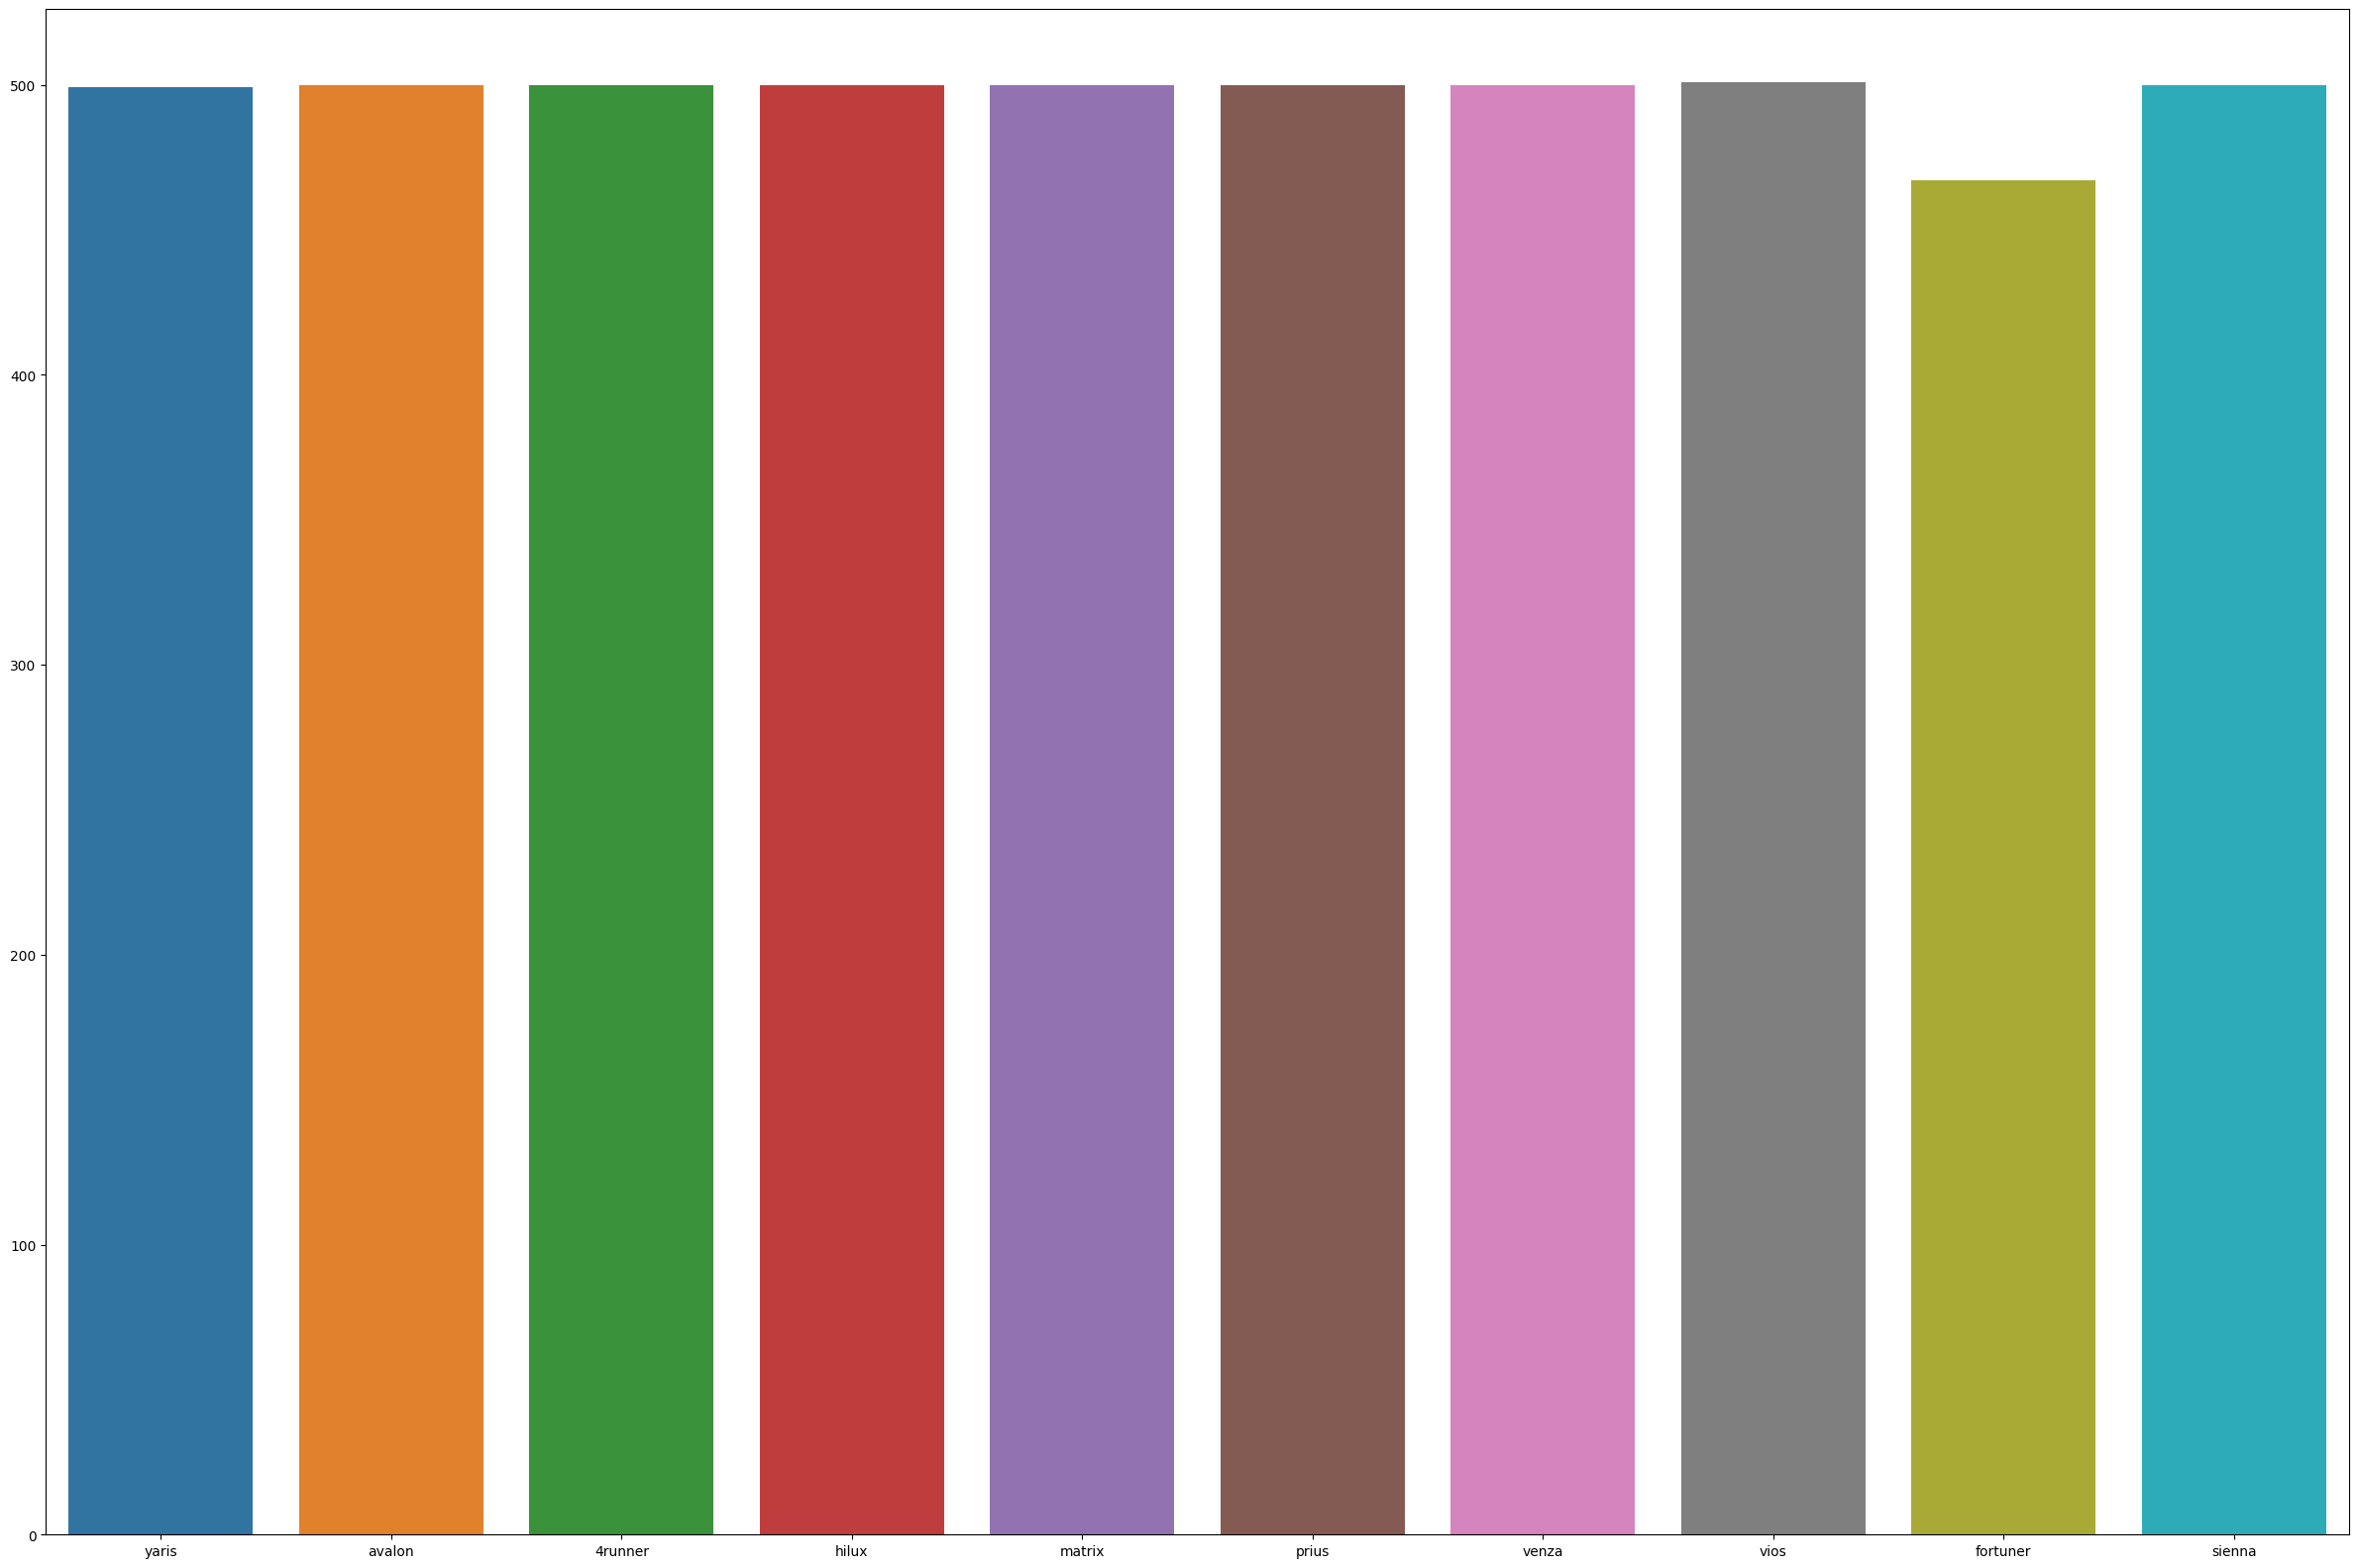

In [16]:
output_directory = '/kaggle/working/train_resized'


all_folders = [folder for folder in os.listdir(output_directory) if os.path.isdir(os.path.join(output_directory, folder))]
file_counter_test = []

for folder in all_folders:
    folder_path = os.path.join(output_directory, folder)
    file_count = len(os.listdir(folder_path))
    print(f"Folder: {folder}, File Count: {file_count}")
    file_counter_test.append(file_count)
x = all_folders  # Categories
y = file_counter_test     # Values
plt.figure(figsize=(30, 20))
#bar plot
sns.barplot(x=x, y=y)
plt.show()

In [17]:
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import tensorflow as tf
from plotly.graph_objs import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
#AlexNet

In [19]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from collections import Counter
import random

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#paths
train_dir = '/kaggle/working/train_resized'
test_dir = '/kaggle/working/test_resized'
NUM_CLASSES = 10
BATCH_SIZE = 32
EPOCHS = 30

train_transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Train dataset classes:", train_dataset.classes)
print("Test dataset classes:", test_dataset.classes)
print("Train class-to-index mapping:", train_dataset.class_to_idx)
assert train_dataset.classes == test_dataset.classes, "Train and test class orders do not match!"

class_labels = train_dataset.classes
print("Class labels for reporting:", class_labels)

train_labels = [train_dataset.targets[i] for i in range(len(train_dataset))]
class_counts = Counter(train_labels)
class_weights = [len(train_dataset) / (NUM_CLASSES * class_counts[i]) for i in range(NUM_CLASSES)]
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print("Class Weights:", class_weights)

# Load pre-trained AlexNet
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)

for param in model.features.parameters():
    param.requires_grad = False

#(FC layers)
model.classifier = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(9216, 4096),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(inplace=True),
    nn.Linear(4096, NUM_CLASSES)
)

# Move model to device
model = model.to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)  # Optimize only classifier
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

#train
train_losses = []
val_accuracies = []
model.train()
for epoch in range(EPOCHS):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    scheduler.step()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}")

    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    model.train()


model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


print("\nSample Predictions:")
for i in range(5):
    print(f"Sample {i+1}: True: {class_labels[y_true[i]]}, Predicted: {class_labels[y_pred[i]]}")


custom_class_labels = ['fortuner', 'hilux', 'venza', 'matrix', 'sienna', 'avalon', '4runner', 'yaris', 'prius', 'vios']
index_mapping = {train_dataset.class_to_idx[cls]: custom_class_labels.index(cls) for cls in class_labels}
y_true_mapped = [index_mapping[yt] for yt in y_true]
y_pred_mapped = [index_mapping[yp] for yp in y_pred]

report = classification_report(y_true_mapped, y_pred_mapped, target_names=custom_class_labels, output_dict=True)
print("\nMetrics for AlexNet:")
print(f"Accuracy: {report['accuracy']:.4f}")
print(f"Weighted Precision: {report['weighted avg']['precision']:.4f}")
print(f"Weighted Recall: {report['weighted avg']['recall']:.4f}")
print(f"Weighted F1-Score: {report['weighted avg']['f1-score']:.4f}")
print("\nPer-Class Metrics:")
for cls in custom_class_labels:
    print(f"{cls} - Precision: {report[cls]['precision']:.4f}, Recall: {report[cls]['recall']:.4f}, F1-Score: {report[cls]['f1-score']:.4f}")

cm = confusion_matrix(y_true_mapped, y_pred_mapped)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_class_labels, yticklabels=custom_class_labels)
plt.title('Confusion Matrix - AlexNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')
plt.close()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('training_plots.png')
plt.close()

Train dataset classes: ['4runner', 'avalon', 'fortuner', 'hilux', 'matrix', 'prius', 'sienna', 'venza', 'vios', 'yaris']
Test dataset classes: ['4runner', 'avalon', 'fortuner', 'hilux', 'matrix', 'prius', 'sienna', 'venza', 'vios', 'yaris']
Train class-to-index mapping: {'4runner': 0, 'avalon': 1, 'fortuner': 2, 'hilux': 3, 'matrix': 4, 'prius': 5, 'sienna': 6, 'venza': 7, 'vios': 8, 'yaris': 9}
Class labels for reporting: ['4runner', 'avalon', 'fortuner', 'hilux', 'matrix', 'prius', 'sienna', 'venza', 'vios', 'yaris']
Class Weights: tensor([0.9932, 0.9932, 1.0634, 0.9932, 0.9932, 0.9932, 0.9932, 0.9932, 0.9932,
        0.9952], device='cuda:0')


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 208MB/s] 


Epoch 1/30, Loss: 2.3347
Validation Accuracy: 0.3938
Epoch 2/30, Loss: 1.6484
Validation Accuracy: 0.4566
Epoch 3/30, Loss: 1.4590
Validation Accuracy: 0.4716
Epoch 4/30, Loss: 1.3258
Validation Accuracy: 0.4985
Epoch 5/30, Loss: 1.2900
Validation Accuracy: 0.5125
Epoch 6/30, Loss: 1.1950
Validation Accuracy: 0.5484
Epoch 7/30, Loss: 1.1034
Validation Accuracy: 0.5673
Epoch 8/30, Loss: 0.9454
Validation Accuracy: 0.5922
Epoch 9/30, Loss: 0.8317
Validation Accuracy: 0.5942
Epoch 10/30, Loss: 0.7966
Validation Accuracy: 0.5892
Epoch 11/30, Loss: 0.7658
Validation Accuracy: 0.5992
Epoch 12/30, Loss: 0.7517
Validation Accuracy: 0.6042
Epoch 13/30, Loss: 0.7017
Validation Accuracy: 0.5992
Epoch 14/30, Loss: 0.7098
Validation Accuracy: 0.6032
Epoch 15/30, Loss: 0.6924
Validation Accuracy: 0.6062
Epoch 16/30, Loss: 0.6771
Validation Accuracy: 0.6012
Epoch 17/30, Loss: 0.6642
Validation Accuracy: 0.6052
Epoch 18/30, Loss: 0.6745
Validation Accuracy: 0.6032
Epoch 19/30, Loss: 0.6694
Validation 

In [20]:
print("\nUnweighted (Macro) Metrics:")
print(f"Macro Precision: {report['macro avg']['precision']:.4f}")
print(f"Macro Recall: {report['macro avg']['recall']:.4f}")
print(f"Macro F1-Score: {report['macro avg']['f1-score']:.4f}")


Unweighted (Macro) Metrics:
Macro Precision: 0.5430
Macro Recall: 0.5432
Macro F1-Score: 0.5374


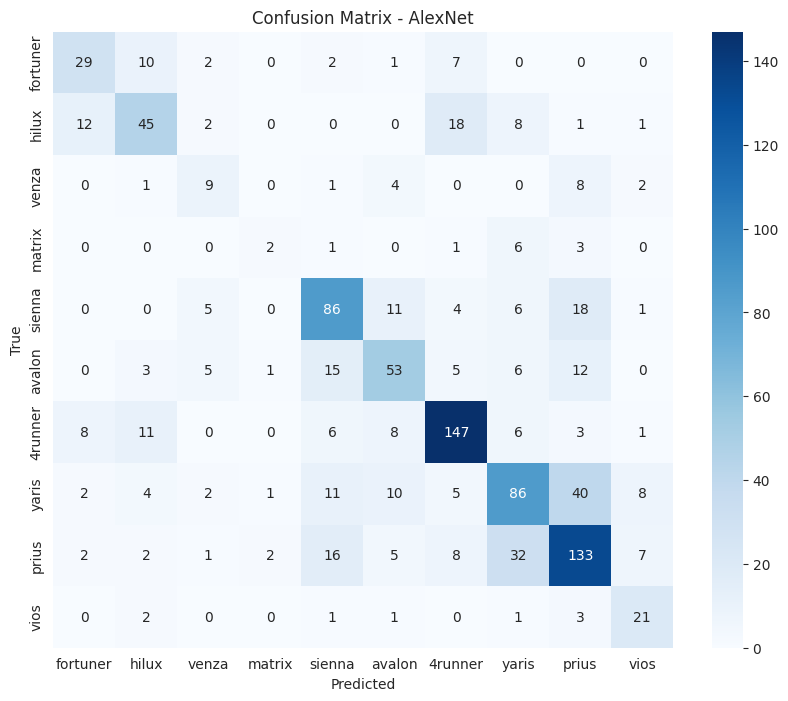

In [21]:
cm = confusion_matrix(y_true_mapped, y_pred_mapped)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=custom_class_labels, yticklabels=custom_class_labels)
plt.title('Confusion Matrix - AlexNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('confusion_matrix.png')

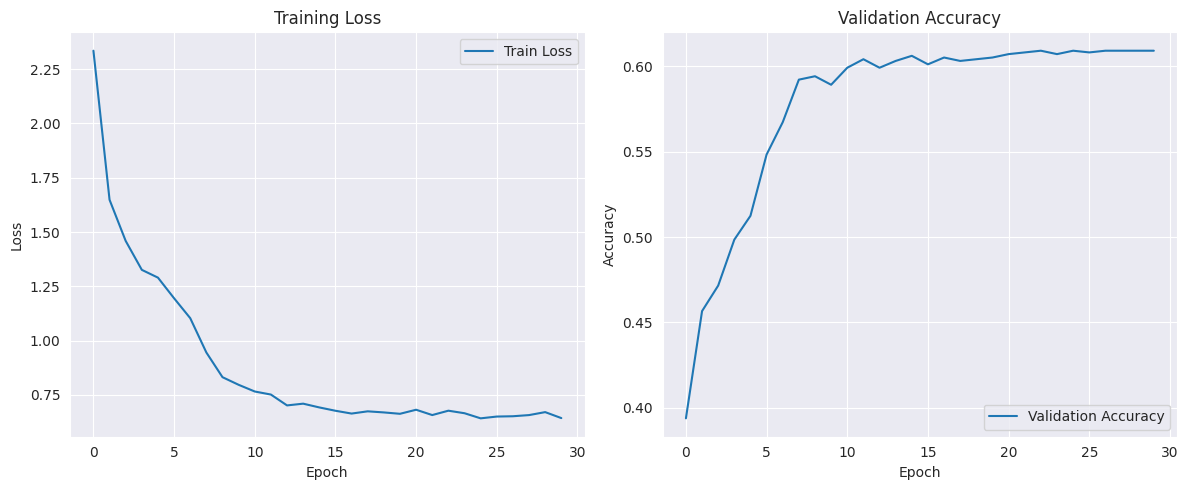

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('training_plots.png')

In [ ]:
#CNN

Found 3974 images belonging to 10 classes.
Found 992 images belonging to 10 classes.
Found 1003 images belonging to 10 classes.
Class indices: {'4runner': 0, 'avalon': 1, 'fortuner': 2, 'hilux': 3, 'matrix': 4, 'prius': 5, 'sienna': 6, 'venza': 7, 'vios': 8, 'yaris': 9}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │     205,522,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │              

 Total params: 208,389,898 (794.94 MB)

 Trainable params: 208,382,090 (794.91 MB)

 Non-trainable params: 7,808 (30.50 KB)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



124/124 ━━━━━━━━━━━━━━━━━━━━ 73s 451ms/step - accuracy: 0.1759 - loss: 2.5651 - val_accuracy: 0.1008 - val_loss: 4.8548 - learning_rate: 0.0010
Epoch 2/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 161us/step - accuracy: 0.2500 - loss: 2.1123 - learning_rate: 0.0010
Epoch 3/60


/usr/lib/python3.10/contextlib.py:153: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning:

Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning:

Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.



124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 380ms/step - accuracy: 0.2547 - loss: 2.1240 - val_accuracy: 0.1139 - val_loss: 4.0384 - learning_rate: 0.0010
Epoch 4/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 158us/step - accuracy: 0.2500 - loss: 2.0053 - learning_rate: 0.0010
Epoch 5/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 381ms/step - accuracy: 0.2934 - loss: 2.0145 - val_accuracy: 0.1865 - val_loss: 2.5905 - learning_rate: 0.0010
Epoch 6/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 136us/step - accuracy: 0.3125 - loss: 2.0935 - learning_rate: 0.0010
Epoch 7/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 379ms/step - accuracy: 0.3434 - loss: 1.8705 - val_accuracy: 0.1956 - val_loss: 2.5067 - learning_rate: 0.0010
Epoch 8/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.3438 - loss: 1.5602 - learning_rate: 0.0010
Epoch 9/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 371ms/step - accuracy: 0.3771 - loss: 1.7839 - val_accuracy: 0.2399 - val_loss: 2.6117 - learning_rate: 0.0010
Epoch 10/60
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 132us/step -

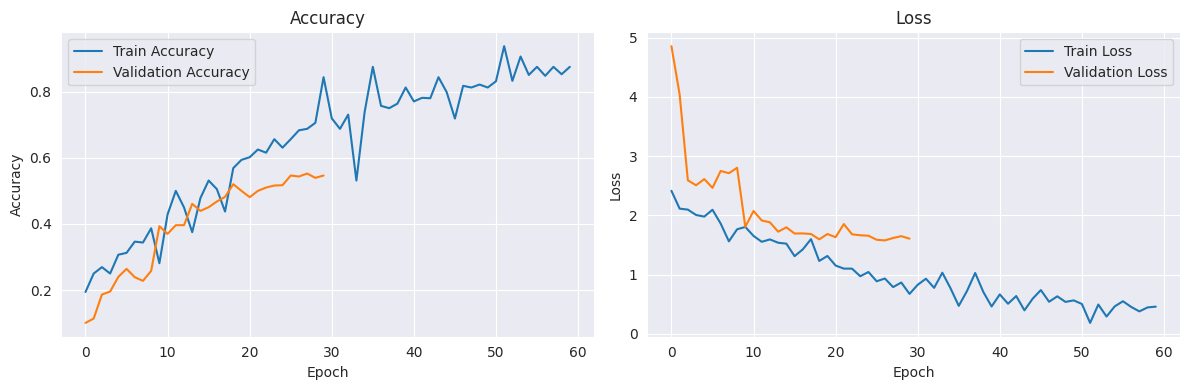

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step


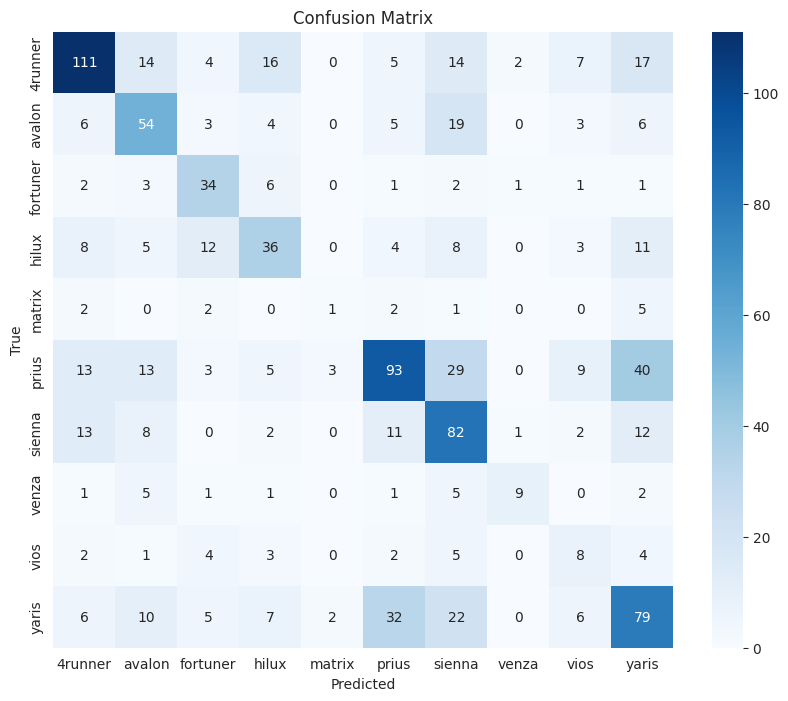

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

TRAIN_DIR = '/kaggle/working/train_resized'
TEST_DIR = '/kaggle/working/test_resized'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 60


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% for validation
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Class indices:", train_generator.class_indices)

model = Sequential([

    Conv2D(64, (3, 3), padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(2048),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.3),
    Dense(1024),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.2),
    Dense(512),
    BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    Dropout(0.2),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save model
model.save('/kaggle/working/custom_cnn_car_classifier.h5')

In [19]:
from sklearn.metrics import f1_score, classification_report

# Compute F1-score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Weighted F1-Score: {f1:.4f}")

# Generate and print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

Weighted F1-Score: 0.5060

Classification Report:
              precision    recall  f1-score   support

     4runner       0.68      0.58      0.63       190
      avalon       0.48      0.54      0.51       100
    fortuner       0.50      0.67      0.57        51
       hilux       0.45      0.41      0.43        87
      matrix       0.17      0.08      0.11        13
       prius       0.60      0.45      0.51       208
      sienna       0.44      0.63      0.52       131
       venza       0.69      0.36      0.47        25
        vios       0.21      0.28      0.24        29
       yaris       0.45      0.47      0.46       169

    accuracy                           0.51      1003
   macro avg       0.46      0.45      0.44      1003
weighted avg       0.52      0.51      0.51      1003



Found 3974 images belonging to 10 classes.
Found 992 images belonging to 10 classes.
Found 1003 images belonging to 10 classes.
Class indices: {'4runner': 0, 'avalon': 1, 'fortuner': 2, 'hilux': 3, 'matrix': 4, 'prius': 5, 'sienna': 6, 'venza': 7, 'vios': 8, 'yaris': 9}
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



124/124 ━━━━━━━━━━━━━━━━━━━━ 60s 411ms/step - accuracy: 0.2215 - loss: 2.8435 - val_accuracy: 0.1976 - val_loss: 2.2132 - learning_rate: 0.0010
Epoch 2/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.2500 - loss: 2.6718 - learning_rate: 0.0010
Epoch 3/45


/usr/lib/python3.10/contextlib.py:153: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning:

Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning:

Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.



124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 378ms/step - accuracy: 0.3802 - loss: 2.0019 - val_accuracy: 0.2621 - val_loss: 2.1256 - learning_rate: 0.0010
Epoch 4/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 95us/step - accuracy: 0.4688 - loss: 1.7423 - learning_rate: 0.0010
Epoch 5/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 376ms/step - accuracy: 0.4432 - loss: 1.6657 - val_accuracy: 0.4204 - val_loss: 1.6925 - learning_rate: 0.0010
Epoch 6/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step - accuracy: 0.3438 - loss: 1.8310 - learning_rate: 0.0010
Epoch 7/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 373ms/step - accuracy: 0.5006 - loss: 1.4795 - val_accuracy: 0.3942 - val_loss: 2.0697 - learning_rate: 0.0010
Epoch 8/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 145us/step - accuracy: 0.4375 - loss: 1.7557 - learning_rate: 0.0010
Epoch 9/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 370ms/step - accuracy: 0.5652 - loss: 1.3117 - val_accuracy: 0.4556 - val_loss: 1.7563 - learning_rate: 0.0010
Epoch 10/45
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 128us/step -

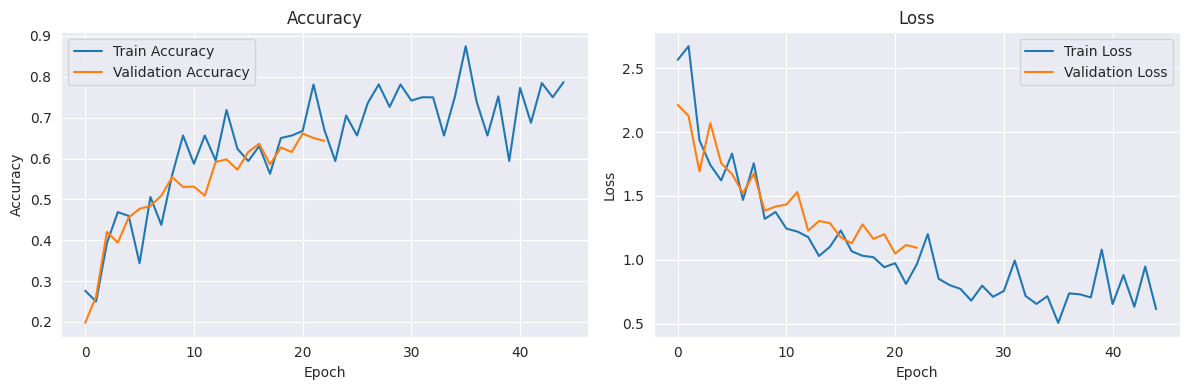

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


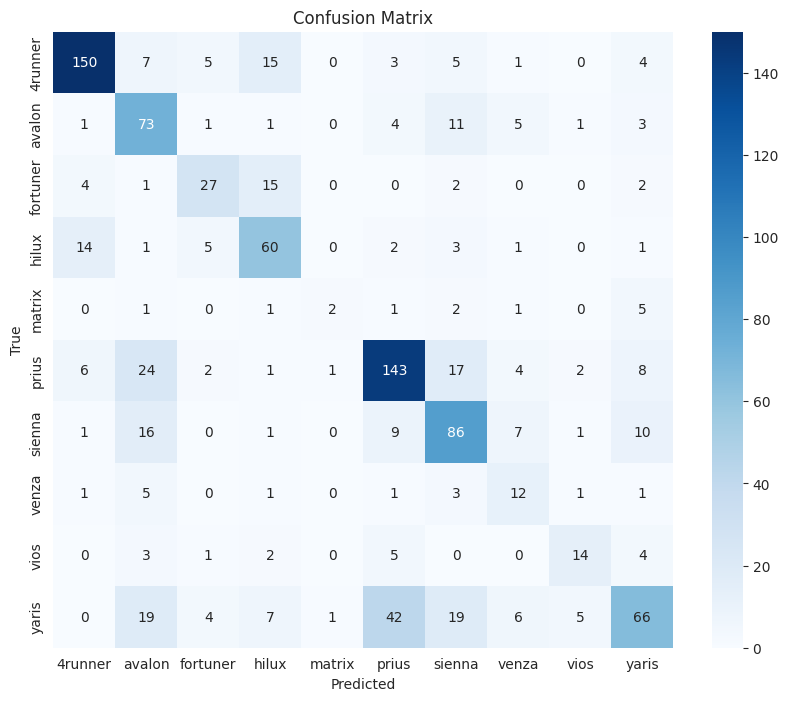

In [43]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

TRAIN_DIR = '/kaggle/working/train_resized'
TEST_DIR = '/kaggle/working/test_resized'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 10
EPOCHS = 45


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Training split
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Validation split
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


print("Class indices:", train_generator.class_indices)

#load VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

# Fine-tuning: Unfreeze some layers
#base_model.trainable = True
#for layer in base_model.layers[:15]:  # Freeze first 15 layers
    #layer.trainable = False

# Recompile with lower learning rate
#model.compile(optimizer=Adam(learning_rate=1e-5, clipnorm=1.0),
              #loss='categorical_crossentropy',
              #metrics=['accuracy'])

# Fine-tune
#history_fine = model.fit(
    #train_generator,
    #steps_per_epoch=train_generator.samples // BATCH_SIZE,
    #validation_data=validation_generator,
    #validation_steps=validation_generator.samples // BATCH_SIZE,
    #epochs=20,
    #callbacks=[early_stopping, lr_scheduler],
    #verbose=1
#)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save model
model.save('/kaggle/working/vgg16_car_classifier_optimized.h5')

In [44]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_true, y_pred_classes, average='weighted')
print(f"Weighted F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

Weighted F1-Score: 0.6280

Classification Report:
              precision    recall  f1-score   support

     4runner       0.85      0.79      0.82       190
      avalon       0.49      0.73      0.58       100
    fortuner       0.60      0.53      0.56        51
       hilux       0.58      0.69      0.63        87
      matrix       0.50      0.15      0.24        13
       prius       0.68      0.69      0.68       208
      sienna       0.58      0.66      0.62       131
       venza       0.32      0.48      0.39        25
        vios       0.58      0.48      0.53        29
       yaris       0.63      0.39      0.48       169

    accuracy                           0.63      1003
   macro avg       0.58      0.56      0.55      1003
weighted avg       0.65      0.63      0.63      1003



In [19]:
from keras.applications import VGG16
VGGmodel = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
VGGmodel.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast_8 (Cast)                        │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [20]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

output_directory = '/kaggle/working/train_resized'
feature_output_directory = '/kaggle/working/feature_embedding_vgg'

os.makedirs(feature_output_directory, exist_ok=True)

# Load VGG16 model
VGGmodel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for VGG16

    features = VGGmodel.predict(img_array)
    
    return features

def extract_and_save_features():
    all_folders = [folder for folder in os.listdir(output_directory) 
                   if os.path.isdir(os.path.join(output_directory, folder))]
    counter = 0
    
    for folder in all_folders:
        folder_path = os.path.join(output_directory, folder)
        feature_folder_path = os.path.join(feature_output_directory, folder)
        os.makedirs(feature_folder_path, exist_ok=True)
        
        image_files = [f for f in os.listdir(folder_path) 
                       if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"Processing folder: {folder}, {len(image_files)} images")
        
        for img_file in image_files:
            img_path = os.path.join(folder_path, img_file)
            try:
                features = extract_features(img_path)
                feature_file_name = os.path.splitext(img_file)[0] + '_features.npy'
                feature_file_path = os.path.join(feature_folder_path, feature_file_name)
                np.save(feature_file_path, features)
                
                print(f"Saved features for {img_file} at {feature_file_path}")
                counter += 1
                print(counter)
            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")


extract_and_save_features()

Processing folder: yaris, 499 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
Saved features for detected_car_542.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_542_features.npy
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Saved features for detected_car_632.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_632_features.npy
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
Saved features for detected_car_552.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_552_features.npy
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Saved features for detected_car_343.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_343_features.npy
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Saved features for detected_car_422.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_422_features.npy
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
Saved features for detected_car_551.jpg at /kaggle/working/feature_embedding_vgg/yaris/detected_car_551_features.npy
6
1/1 ━━━━━━━━━━━

In [21]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

output_directory = '/kaggle/working/test_resized'
feature_output_directory = '/kaggle/working/feature_embedding_test'

os.makedirs(feature_output_directory, exist_ok=True)

# Load VGG16 model
VGGmodel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = VGGmodel.predict(img_array)
    
    return features


def extract_and_save_features():
    all_folders = [folder for folder in os.listdir(output_directory) 
                   if os.path.isdir(os.path.join(output_directory, folder))]
    counter = 0
    for folder in all_folders:
        folder_path = os.path.join(output_directory, folder)
        feature_folder_path = os.path.join(feature_output_directory, folder)
        
        os.makedirs(feature_folder_path, exist_ok=True)
        

        image_files = [f for f in os.listdir(folder_path) 
                       if f.endswith(('.jpg', '.jpeg', '.png'))]
        
        print(f"Processing folder: {folder}, {len(image_files)} images")
        

        for img_file in image_files:
            img_path = os.path.join(folder_path, img_file)
            try:
                features = extract_features(img_path)
                
                feature_file_name = os.path.splitext(img_file)[0] + '_features.npy'
                feature_file_path = os.path.join(feature_folder_path, feature_file_name)
                
                np.save(feature_file_path, features)
                
                print(f"Saved features for {img_file} at {feature_file_path}")
                counter += 1
                print(counter)
            except Exception as e:
                print(f"Error processing {img_file}: {str(e)}")

extract_and_save_features()

Processing folder: yaris, 169 images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Saved features for detected_car_65.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_65_features.npy
1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Saved features for detected_car_164.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_164_features.npy
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Saved features for detected_car_96.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_96_features.npy
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Saved features for detected_car_86.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_86_features.npy
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Saved features for detected_car_45.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_45_features.npy
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Saved features for detected_car_100.jpg at /kaggle/working/feature_embedding_test/yaris/detected_car_100_features.npy
6
1/1 ━━━━━━━━━━━━━

In [22]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump
import glob

#paths
feature_directory = '/kaggle/working/feature_embedding_vgg'
model_output_path = '/kaggle/working/svm_classifier_model.joblib'
feature_test_directory = '/kaggle/working/feature_embedding_test'

#label encoding
label_dict = {
    'supra': 0, 'venza': 1, 'matrix': 2, 'rush': 3, 'revo': 4, 'rav4': 5, 'aygo': 6, 'avanza': 7,
    'vitz': 8, 'hiace': 9, 'innova': 10, 'fortuner': 11, 'yaris': 12, 'camry': 13, 'sequoia': 14,
    'tundra': 15, 'hilux': 16, '4runner': 17, 'avensis': 18, 'iq': 19, 'crown': 20, 'highlander': 21,
    'sienna': 22, 'estima': 23, 'soarer': 24, 'tacoma': 25, 'alphard': 26, 'previa': 27, 'starlet': 28,
    'vios': 29, 'mirai': 30, 'corolla': 31, 'celica': 32, 'verso': 33, 'prius': 34, 'etios': 35,
    'avalon': 36, 'corona': 37
}

#reverse mapping
reverse_label_dict = {v: k for k, v in label_dict.items()}


def load_features_and_labels():
    features = []
    labels = []
    
    # Get all category folders
    categories = [folder for folder in os.listdir(feature_directory) 
                  if os.path.isdir(os.path.join(feature_directory, folder))]
    
    for category in categories:
        if category not in label_dict:
            print(f"Warning: Category {category} not found in label_dict. Skipping.")
            continue
        
        category_path = os.path.join(feature_directory, category)
        feature_files = glob.glob(os.path.join(category_path, '*_features.npy'))
        
        for feature_file in feature_files:
            try:
                
                feature = np.load(feature_file)
                feature = feature.flatten()
                
                features.append(feature)
                labels.append(label_dict[category])
                
            except Exception as e:
                print(f"Error loading {feature_file}: {str(e)}")
                continue
    
    return np.array(features), np.array(labels)

# Step 1: Load features and labels (test)
def load_features_and_labels_test():
    features = []
    labels = []
    
    categories = [folder for folder in os.listdir(feature_test_directory) 
                  if os.path.isdir(os.path.join(feature_test_directory, folder))]
    
    for category in categories:
        if category not in label_dict:
            print(f"Warning: Category {category} not found in label_dict. Skipping.")
            continue
            
        category_path = os.path.join(feature_test_directory, category)
        feature_files = glob.glob(os.path.join(category_path, '*_features.npy'))
        
        for feature_file in feature_files:
            try:
                feature = np.load(feature_file)
                feature = feature.flatten()
                features.append(feature)
                labels.append(label_dict[category])
                
            except Exception as e:
                print(f"Error loading {feature_file}: {str(e)}")
                continue
    
    return np.array(features), np.array(labels)

features, labels = load_features_and_labels()
print(f"Loaded {features.shape[0]} training samples with feature dimension {features.shape[1]}")
print(f"Unique training labels: {np.unique(labels)}")

features_test, labels_test = load_features_and_labels_test()
print(f"Loaded {features_test.shape[0]} test samples with feature dimension {features_test.shape[1]}")
print(f"Unique test labels: {np.unique(labels_test)}")

train_labels_set = set(np.unique(labels))
test_labels_set = set(np.unique(labels_test))
if not test_labels_set.issubset(train_labels_set):
    print(f"Warning: Test set contains labels not present in training set: {test_labels_set - train_labels_set}")

#SVM classifier
classifier = SVC(kernel='linear', random_state=42, C=1.0)
classifier.fit(features, labels)

y_pred = classifier.predict(features_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

unique_test_labels = np.unique(labels_test)
target_names = [reverse_label_dict[label] for label in unique_test_labels]
print(classification_report(labels_test, y_pred, labels=unique_test_labels, target_names=target_names))


dump(classifier, model_output_path)
dump(reverse_label_dict, '/kaggle/working/reverse_label_dict.joblib')
print(f"Trained SVM model saved at {model_output_path}")
print(f"Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib")


Loaded 4967 training samples with feature dimension 25088
Unique training labels: [ 1  2 11 12 16 17 22 29 34 36]
Loaded 1002 test samples with feature dimension 25088
Unique test labels: [ 1  2 11 12 16 17 22 29 34 36]
Test Accuracy: 0.7236

Classification Report:
              precision    recall  f1-score   support

       venza       0.52      0.64      0.57        25
      matrix       0.25      0.23      0.24        13
    fortuner       0.69      0.67      0.68        51
       yaris       0.66      0.66      0.66       169
       hilux       0.57      0.74      0.64        87
     4runner       0.83      0.80      0.81       190
      sienna       0.80      0.77      0.78       131
        vios       0.45      0.50      0.47        28
       prius       0.82      0.73      0.77       208
      avalon       0.77      0.79      0.78       100

    accuracy                           0.72      1002
   macro avg       0.64      0.65      0.64      1002
weighted avg       0.73      0

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

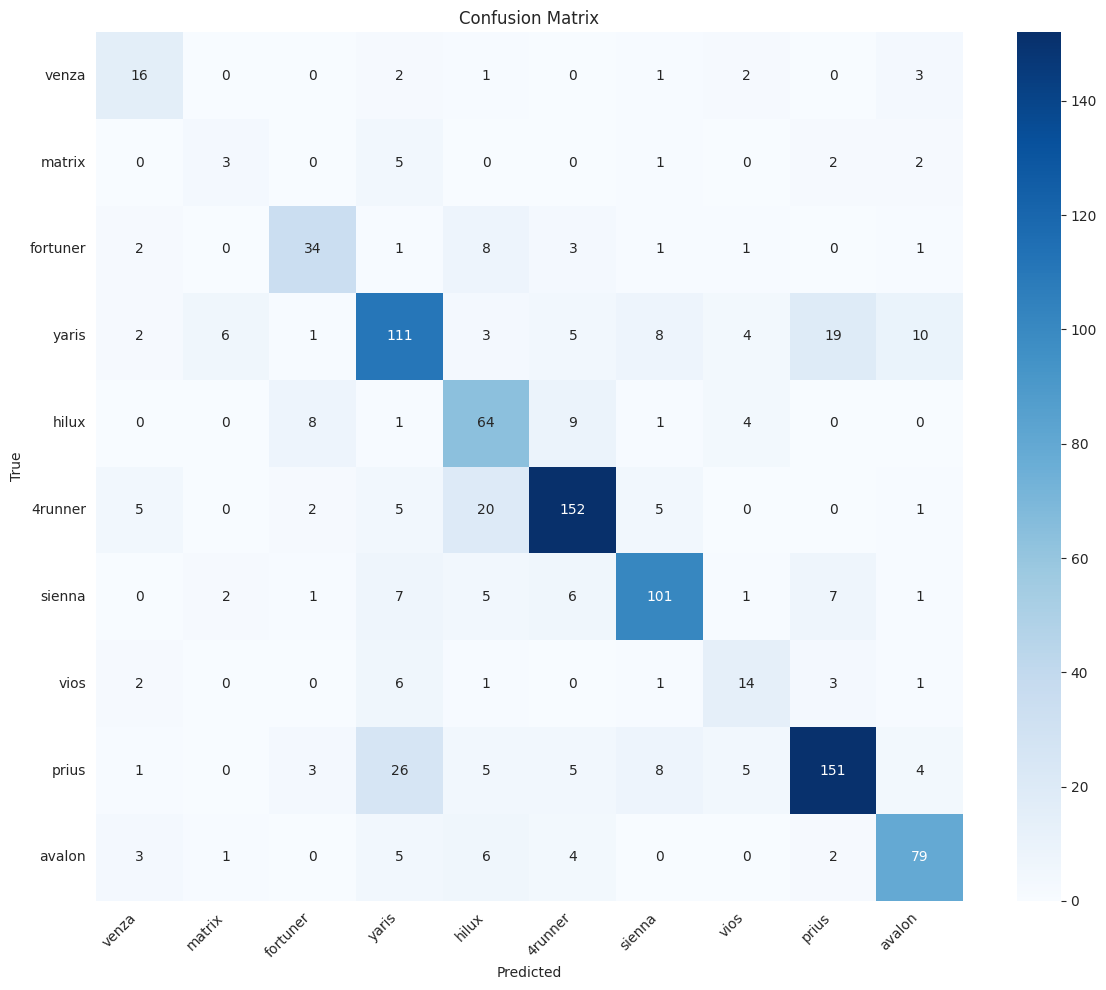

In [25]:
cm = confusion_matrix(labels_test, y_pred, labels=unique_test_labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
#Use RBF
classifier = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale')

classifier.fit(features, labels)
y_pred = classifier.predict(features_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
unique_test_labels = np.unique(labels_test)
target_names = [reverse_label_dict[label] for label in unique_test_labels]
print(classification_report(labels_test, y_pred, labels=unique_test_labels, target_names=target_names))

dump(classifier, model_output_path)
dump(reverse_label_dict, '/kaggle/working/reverse_label_dict.joblib')
print(f"Trained SVM model saved at {model_output_path}")
print(f"Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib")

Test Accuracy: 0.6617

Classification Report:
              precision    recall  f1-score   support

       venza       0.53      0.36      0.43        25
      matrix       0.14      0.08      0.10        13
    fortuner       0.68      0.63      0.65        51
       yaris       0.53      0.60      0.56       169
       hilux       0.58      0.72      0.65        87
     4runner       0.79      0.79      0.79       190
      sienna       0.77      0.69      0.73       131
        vios       0.28      0.36      0.31        28
       prius       0.73      0.61      0.67       208
      avalon       0.69      0.79      0.73       100

    accuracy                           0.66      1002
   macro avg       0.57      0.56      0.56      1002
weighted avg       0.67      0.66      0.66      1002

Trained SVM model saved at /kaggle/working/svm_classifier_model.joblib
Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib


In [27]:
#Alternative
classifier = SVC(kernel='poly', degree=2, random_state=42, C=1.0)

classifier.fit(features, labels)

y_pred = classifier.predict(features_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

unique_test_labels = np.unique(labels_test)
target_names = [reverse_label_dict[label] for label in unique_test_labels]
print(classification_report(labels_test, y_pred, labels=unique_test_labels, target_names=target_names))

dump(classifier, model_output_path)
dump(reverse_label_dict, '/kaggle/working/reverse_label_dict.joblib')
print(f"Trained SVM model saved at {model_output_path}")
print(f"Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib")

Test Accuracy: 0.6317

Classification Report:
              precision    recall  f1-score   support

       venza       0.24      0.44      0.31        25
      matrix       0.07      0.23      0.11        13
    fortuner       0.46      0.63      0.53        51
       yaris       0.65      0.51      0.57       169
       hilux       0.60      0.67      0.63        87
     4runner       0.85      0.71      0.78       190
      sienna       0.79      0.64      0.71       131
        vios       0.33      0.46      0.39        28
       prius       0.73      0.62      0.68       208
      avalon       0.60      0.81      0.69       100

    accuracy                           0.63      1002
   macro avg       0.53      0.57      0.54      1002
weighted avg       0.68      0.63      0.65      1002

Trained SVM model saved at /kaggle/working/svm_classifier_model.joblib
Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib


In [28]:
#Alternative
classifier = SVC(kernel='sigmoid', coef0=1.0, random_state=42, C=1.0)

classifier.fit(features, labels)

y_pred = classifier.predict(features_test)
accuracy = accuracy_score(labels_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")

unique_test_labels = np.unique(labels_test)
target_names = [reverse_label_dict[label] for label in unique_test_labels]
print(classification_report(labels_test, y_pred, labels=unique_test_labels, target_names=target_names))

dump(classifier, model_output_path)
dump(reverse_label_dict, '/kaggle/working/reverse_label_dict.joblib')
print(f"Trained SVM model saved at {model_output_path}")
print(f"Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib")

Test Accuracy: 0.5299

Classification Report:
              precision    recall  f1-score   support

       venza       0.28      0.28      0.28        25
      matrix       0.03      0.08      0.05        13
    fortuner       0.50      0.33      0.40        51
       yaris       0.50      0.40      0.44       169
       hilux       0.44      0.46      0.45        87
     4runner       0.72      0.73      0.73       190
      sienna       0.56      0.61      0.58       131
        vios       0.16      0.46      0.24        28
       prius       0.65      0.47      0.54       208
      avalon       0.57      0.69      0.63       100

    accuracy                           0.53      1002
   macro avg       0.44      0.45      0.43      1002
weighted avg       0.56      0.53      0.54      1002

Trained SVM model saved at /kaggle/working/svm_classifier_model.joblib
Reverse label dictionary saved at /kaggle/working/reverse_label_dict.joblib


In [ ]:
f1-score = {}
recal = {}
acc = {}
preci = {}

In [ ]:
SVMClassifier = {'recall':64% , 'f1-score':63%,'precision':62%,'accuracy':70%}
VGG = {'recall':56% , 'f1-score':55%,'precision':58%,'accuracy':63%}
CNN = {'recall':45% , 'f1-score':44%,'precision':46%,'accuracy':51%}
AlexNet = {'recall':54% , 'f1-score':53%,'precision':54%,'accuracy':60%}

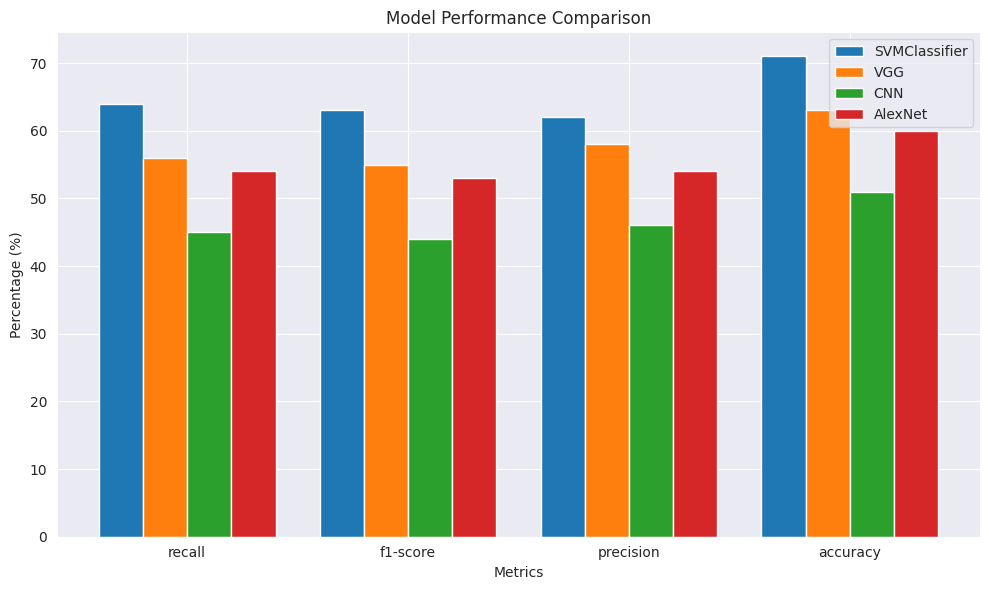

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['SVMClassifier', 'VGG', 'CNN', 'AlexNet']
metrics = ['recall', 'f1-score', 'precision', 'accuracy']
data = {
    'SVMClassifier': {'recall': 64, 'f1-score': 63, 'precision': 62, 'accuracy': 71},
    'VGG': {'recall': 56, 'f1-score': 55, 'precision': 58, 'accuracy': 63},
    'CNN': {'recall': 45, 'f1-score': 44, 'precision': 46, 'accuracy': 51},
    'AlexNet': {'recall': 54, 'f1-score': 53, 'precision': 54, 'accuracy': 60}
}

# Colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(metrics))

# Plot bars for each model
for i, model in enumerate(models):
    values = [data[model][metric] for metric in metrics]
    ax.bar(x + i * bar_width, values, bar_width, label=model, color=colors[i])

# Customize plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Percentage (%)')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels(metrics)
ax.legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig('model_comparison_bar_plot.png')